# Decision Tree Regression

Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

Attribute information

Inputs

Cement

Blast Furnace Slag

Fly Ash

Water

Superplasticizer

Coarse Aggregate

Fine Aggregate

All above features measured in kg/$m^3$

Age (in days)

Output

Concrete Compressive Strength (Mpa)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/Concrete_Data (1).csv')

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate',
        'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ':'Concrete Strength'}, inplace = True)

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Strength'],
      dtype='object')

In [ ]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Concrete Strength     0
dtype: int64

In [ ]:
num_cols = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


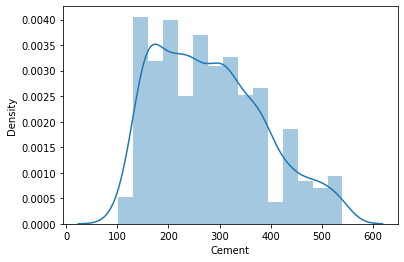

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


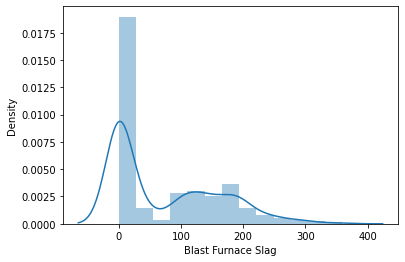

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


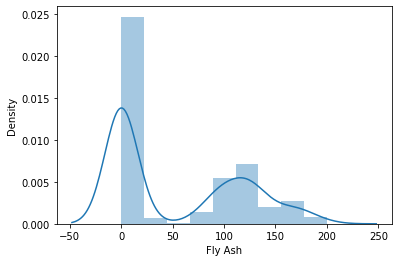

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


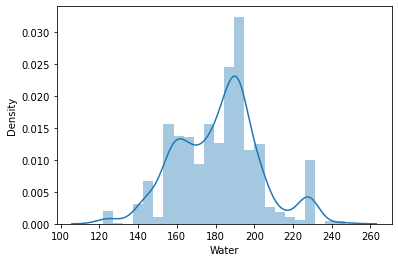

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


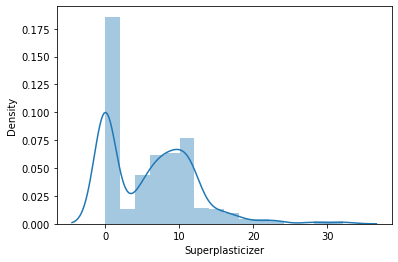

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


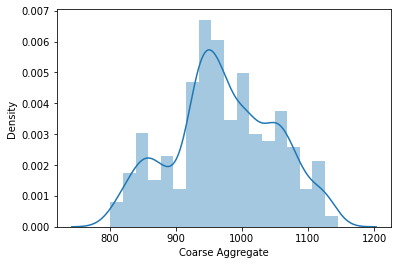

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


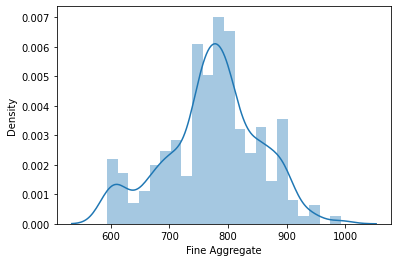

<ipython-input-10-e505a0e5edf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


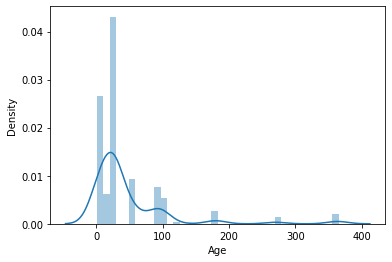

In [ ]:
for i in num_cols:
  sns.distplot(df[i])
  plt.show()

In [ ]:
scalar = StandardScaler()

df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']]=scalar.fit_transform(df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']])

In [ ]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,79.99
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,61.89
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,40.27
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,41.05
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,44.30
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733,44.28
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733,31.18
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733,23.70
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733,32.77


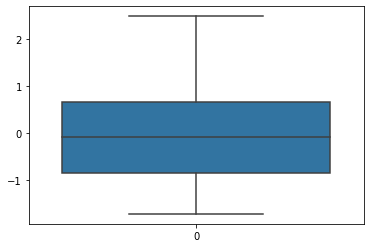

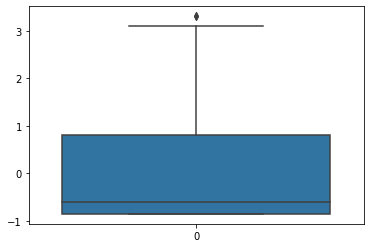

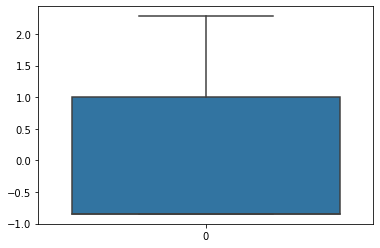

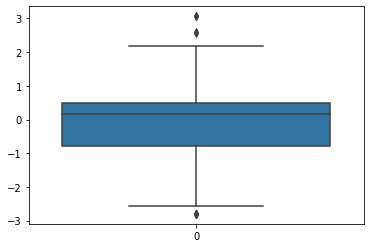

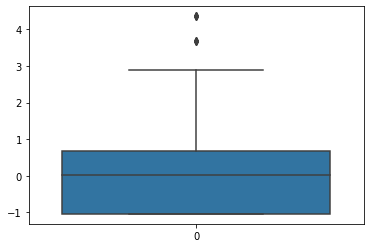

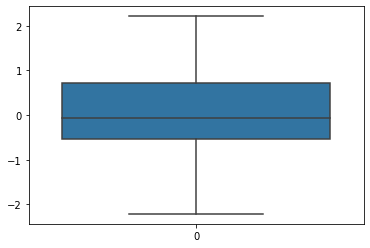

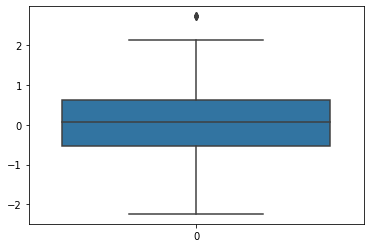

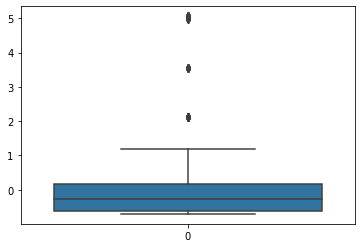

In [ ]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
for i in num_cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR  = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR 
  upper_limit = Q3 + 1.5 * IQR
  data = df[~((df.loc[:,[i]] < lower_limit) | (df.loc[:,[i]] > upper_limit)).any(axis=1)]
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,79.99
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,61.89
5,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,0.702224,47.03
7,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.279733,36.45
8,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,45.85
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733,44.28
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733,31.18
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733,23.70
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733,32.77


In [ ]:
#for i in data:
 # sns.boxplot(data[i])
 # plt.show()

In [ ]:
x= data.drop('Concrete Strength',axis = 1)
y= data['Concrete Strength']

In [ ]:

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=123)

In [ ]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
342,0.153483,-0.856888,0.989771,-0.317060,0.551896,0.641836,-0.250577,0.163731
926,-1.140847,1.624633,1.716721,0.957312,0.635635,-1.967658,-1.167756,-0.279733
423,-1.041283,-0.699184,1.848041,-1.160394,-0.352484,0.429525,1.033473,-0.501465
790,0.649387,-0.856888,-0.847144,0.488793,-1.039143,0.953226,0.404551,0.702224
131,0.941377,0.896411,-0.847144,-1.296265,1.623754,2.076543,-2.103652,-0.279733
...,...,...,...,...,...,...,...,...
132,0.779586,1.334735,-0.847144,-0.780894,0.903600,-0.363102,-0.221876,-0.279733
356,-0.037986,0.277190,-0.464128,-0.977672,0.836609,1.142375,0.111303,-0.279733
416,-0.647814,-0.856888,1.876181,-1.047950,0.920347,0.909477,-0.020970,-0.675683
399,-0.451559,0.952071,-0.847144,0.348237,-0.051024,0.103982,-0.169466,-0.279733


In [ ]:
dtree = DecisionTreeRegressor(max_depth = 8,min_samples_split=2,min_samples_leaf=3,)

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3)

In [ ]:
train_pred=dtree.predict(x_train)
test_pred=dtree.predict(x_test)     

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
train_acc =r2_score(y_train, train_pred)
test_acc= r2_score(y_test, test_pred)

In [ ]:
train_mse =mean_squared_error(y_train, train_pred)
test_mse= mean_squared_error(y_test, test_pred)

In [ ]:
print('train acc :', train_acc)
print('test acc:', test_acc)

train acc : 0.9348640316040027
test acc: 0.8180899296539027


In [ ]:
print('train mse :', train_mse)
print('test mse:', test_mse)

train mse : 17.902013877590495
test mse: 58.728949218137004


In [ ]:
rand = RandomForestRegressor(max_depth=18,min_samples_leaf=2,min_samples_split=5)

In [ ]:
rand.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=2, min_samples_split=5)

In [ ]:
train_pred1=rand.predict(x_train)
test_pred1=rand.predict(x_test)   

In [ ]:
train_r2 =r2_score(y_train, train_pred1)
test_r2= r2_score(y_test, test_pred1)

In [ ]:
print('train acc :', train_r2)
print('test acc:', test_r2)

train acc : 0.9686387182995407
test acc: 0.8953196958390938


In [ ]:
train_mse1 =mean_squared_error(y_train, train_pred1)
test_mse1= mean_squared_error(y_test, test_pred1)

In [ ]:
print('train mse :', train_mse1)
print('test mse:', test_mse1)

train mse : 8.61935600323625
test mse: 33.795623604061184


In [ ]:
param_grid = {
    'max_depth': range(1, 5),
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_cv = GridSearchCV(dtree, param_grid, cv=5)

In [ ]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=8, min_samples_leaf=3),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 6]})

In [ ]:
train_p2=grid_cv.predict(x_train)
test_p2=grid_cv.predict(x_test) 

In [ ]:
train_r2 =r2_score(y_train, train_p2)
test_r2= r2_score(y_test, test_p2)

In [ ]:
print('train acc :', train_r2)
print('test acc:', test_r2)

train acc : 0.7432466651894096
test acc: 0.7237416274995359


In [ ]:
train_mse1 =mean_squared_error(y_train, train_p2)
test_mse1= mean_squared_error(y_test, test_p2)

In [ ]:
print('train mse :', train_mse1)
print('test mse:', test_mse1)

train mse : 70.56626125450039
test mse: 89.18892669766377


In [ ]:
grid_cv = GridSearchCV(rand, param_grid, cv=5)

In [ ]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=18, min_samples_leaf=2,
                                             min_samples_split=5),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 6]})

In [ ]:
train_p1=grid_cv.predict(x_train)
test_p1=grid_cv.predict(x_test)   

In [ ]:
train_r2 =r2_score(y_train, train_p1)
test_r2= r2_score(y_test, test_p1)

In [ ]:
print('train acc :', train_r2)
print('test acc:', test_r2)

train acc : 0.8303890564445074
test acc: 0.7869225633673258


In [ ]:
train__mse1 = mean_squared_error(y_train, train_p1)
test_mse1= mean_squared_error(y_test,test_p1)
rmse = np.sqrt(train_mse1)
rmse2 = np.sqrt(test_mse1)



In [ ]:
print('train mse :', train_mse1)
print('test mse:', test_mse1)

train mse : 70.56626125450039
test mse: 68.79121057851648


In [ ]:
print('RMSE :', rmse)
print('RMSE:', rmse2)

RMSE : 8.400372685452735
RMSE: 8.294046694980471
